In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 32
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [4]:
securities = {'AUD_CHF':56,
              'AUD_JPY':32,
              'AUD_USD':56,
              'AUS200':32,
              'CAD_CHF':56,
              'CAD_JPY':32,
              'EUR_AUD':56,
              'EUR_GBP':56,
              'EUR_JPY':32,
              'EUR_NZD':32,
              'EUR_TRY':56,
              'GBP_AUD':56,
              'GBP_CAD':32,
              'GBP_CHF':32,
              'GBP_JPY':56,
              'GBP_NZD':56,
              'GBP_USD':56,
              'NAS100':32,
              'NZD_CAD':56,
              'NZD_CHF':32,
              'NZD_JPY':56,
              'NZD_USD':32,
              'SPX500':56,
              'US30':32,
              'USD_NOK':32,
              'USD_SEK':56,
              'XAU_USD':56,
            }

In [174]:
filesel ={'AUD_CHF':'2',
         'AUD_JPY':'2',
         'AUD_USD':'2a',
         'AUS200':'1a',
         'CAD_CHF':'2a',
         'CAD_JPY':'2',
         'EUR_AUD':'1b',
         'EUR_GBP':'2',
         'EUR_JPY':'2',
         'EUR_NZD':'2a',
         'EUR_TRY':'2a',
         'GBP_AUD':'2',
         'GBP_CAD':'1a',
         'GBP_CHF':'3',
         'GBP_JPY':'2',
         'GBP_NZD':'2a',
         'GBP_USD':'2a',
         'NAS100':'2a',
         'NZD_CAD':'3',
         'NZD_CHF':'1a',
         'NZD_JPY':'1a',
         'NZD_USD':'1',
         'SPX500':'2a',
         'US30':'2',
         'USD_NOK':'2',
         'USD_SEK':'2',
         'XAU_USD':'3'
            }

In [175]:
keys=[*securities]

In [276]:
instrument_no=26
instrument=keys[instrument_no]
days=securities[instrument]

In [277]:
request_period='D1'
path = '/storage/candles/new_20200123'
model_path=path+'/models08'
image_data_path=path+'/images08/'+instrument+'_'+str(days)
model_fname=model_path+'/'+instrument+'_'+str(days)+'_RN34_Model_'+filesel[instrument]
model_save=model_path+'/'+instrument+'_'+str(days)+'_RN34_Model_4'


In [278]:
np.random.seed(20)
pat = r'_L([S0L])\.png$'

In [279]:
fnames = get_image_files(image_data_path)

In [280]:
data = ImageDataBunch.from_name_re(image_data_path, fnames, pat, size=224, bs=bs).normalize(imagenet_stats)

In [281]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [282]:
learn.load(model_fname)

Learner(data=ImageDataBunch;

Train: LabelList (1940 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,S,0,0,0
Path: /storage/candles/new_20200123/images08/XAU_USD_56;

Valid: LabelList (484 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,S,0,0,0
Path: /storage/candles/new_20200123/images08/XAU_USD_56;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momen

In [283]:
print(data.classes)
len(data.classes),data.c

['0', 'L', 'S']


(3, 3)

In [284]:
#interp = ClassificationInterpretation.from_learner(learn)

In [285]:
#interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

In [286]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [287]:
instrument

'XAU_USD'

In [288]:
model_fname

'/storage/candles/new_20200123/models08/XAU_USD_56_RN34_Model_3'

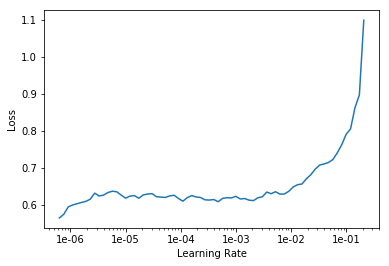

In [289]:
learn.recorder.plot()

In [290]:
learn.unfreeze()
learn.fit_one_cycle(1, max_lr=1e-6)
#learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.596834,0.515576,0.204545,00:22


In [271]:
#interp = ClassificationInterpretation.from_learner(learn)

In [272]:
#interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

In [273]:
learn.save(model_save)

In [274]:
model_save

'/storage/candles/new_20200123/models08/USD_SEK_56_RN34_Model_4'